# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_dayer"+str(i+1))(x)
            
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [10]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 1e-1
EPOCHS = 1
BATCH_SIZE = 256 
MOMENTUM = 0.5
OPTIMIZER = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for optim in OPTIMIZER:
    keras.backend.clear_session()
    print(f"Experiment With Optimizer {optim}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if optim == 'SGD':
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=MOMENTUM)
    elif optim == 'RMSprop':
        optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE, momentum=MOMENTUM)
    elif optim == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE)
    else:
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"Optim:{optim}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid_loss': valid_loss,
                             'train_acc': train_acc,
                             'valid_acc': valid_acc
                            }

Experiment With Optimizer SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_dayer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_dayer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
196/196 [==============================] - 4s 18ms/step - loss: 2.0089 - accuracy: 0.26

Optim:SGD
[2.0088798999786377]
[2.0088798999786377]
Optim:RMSprop
[9178.28515625]
[9178.28515625]
Optim:AdaGrad
[2.289928436279297]
[2.289928436279297]
Optim:Adam
[275.9292297363281]
[275.9292297363281]


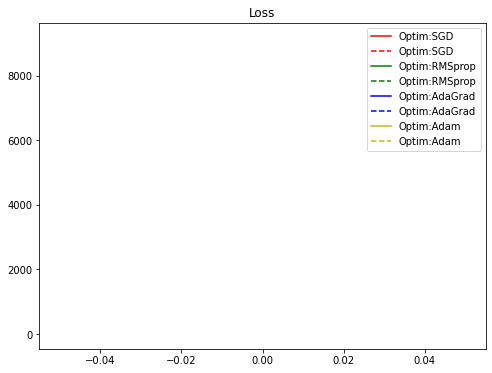

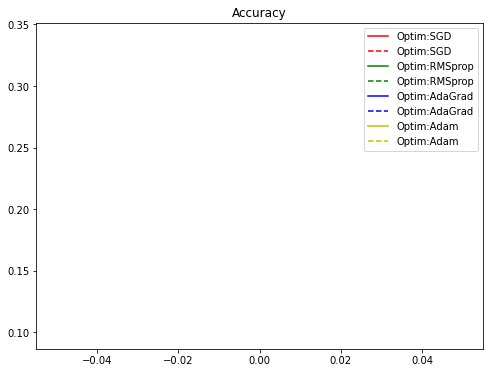

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    print(cond)
    print(results[cond]['train-loss'])
    print(results[cond]['train-loss'])
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
    

In [13]:
results

{'Optim:SGD': {'train-loss': [2.0088798999786377],
  'valid_loss': [1.8322075605392456],
  'train_acc': [0.2688399851322174],
  'valid_acc': [0.3393999934196472]},
 'Optim:RMSprop': {'train-loss': [9178.28515625],
  'valid_loss': [2.3287367820739746],
  'train_acc': [0.09870000183582306],
  'valid_acc': [0.10000000149011612]},
 'Optim:AdaGrad': {'train-loss': [2.289928436279297],
  'valid_loss': [2.1261754035949707],
  'train_acc': [0.163100004196167],
  'valid_acc': [0.21410000324249268]},
 'Optim:Adam': {'train-loss': [275.9292297363281],
  'valid_loss': [2.303335189819336],
  'train_acc': [0.09926000237464905],
  'valid_acc': [0.10010000318288803]}}